## Laboratory work 1: The human brain connectome

Dear students!

In our first laboratory activity, we would like to invite you to explore the human brain connectome that was obtained as part of our research project __[Human Connectome Project (HCP)](https://www.humanconnectome.org/)__ (in the following __[article](https://link.springer.com/article/10.1007/s11571-017-9445-1)__).

You have been provided with __[several files](https://drive.google.com/drive/folders/1aLmWQfYGP5jOa0cojA5zgpPP3sMeso_Li7r9KZaJ6GVSpMupYsIjeBmKa3oZ69LXiuSaWyul?usp=sharing)__ for the same connectome at different resolutions, in case you would like to manipulate the data on smaller graphs or use some more complex algorithms.

However, it is recommended to present the final results at the highest possible resolution of the connectome.

Total points for all problems: `100`

In [ ]:
from collections import defaultdict
from typing import Union
import os.path as osp
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import networkx as nx

### Utils

In [ ]:
def brain_area_function(
    brain_area_name: str,
    map: dict[str, str] = None,
) -> str:
    """
    Retrieves the function of a brain area by mapping its name through a provided dictionary.
    If the brain area name is not found, returns the original name.

    Args:
        brain_area_name (str):
            The name of the brain area.
        map (dict[str, str], optional):
            A dictionary mapping brain area names to their respective functions.
            Defaults to an empty dictionary if not provided.

    Returns:
        str: The mapped function of the brain area if available, otherwise the original name.
    """
    if map is None:
        map = {
            "Cortical": "Higher cognitive functions, thinking",
            "Subcortical": "Movement regulation, emotions, memory",
            "Parstriangularis": "Speech processing, language comprehension",
            "Precentral": "Movement control (motor cortex)",
            "Superiorparietal": "Spatial perception, attention",
            "Lateraloccipital": "Visual information processing",
            "Entorhinal": "Memory formation, connection with the hippocampus",
            "Left-pallidum": "Movement, regulation of motor functions",
            "Right-pallidum": "Movement, regulation of motor functions",
            "Posteriorcingulate": "Memory, attention, orientation",
            "Caudalmiddlefrontal": "Planning, cognitive control",
            "Right-thalamus-proper": "Transmission of sensory signals to the cortex",
            "Left-thalamus-proper": "Transmission of sensory signals to the cortex",
            "Left-amygdala": "Emotions, fear, aggression",
            "Right-amygdala": "Emotions, fear, aggression",
            "Parsopercularis": "Speech production, sound processing",
            "Caudalanteriorcingulate": "Emotion control, decision-making",
            "Parsorbitalis": "Regulation of behavior, social interactions",
            "Medialorbitofrontal": "Training, evaluation of remuneration",
            "Right-accumbens-area": "Motivation, reward system",
            "Left-accumbens-area": "Motivation, reward system",
            "Lingual": "Visual information processing",
            "Right-caudate": "Movement control, training",
            "Left-caudate": "Movement control, training",
            "Postcentral": "Sensory information, sense of touch",
            "Temporalpole": "Memory, emotion processing",
            "Precuneus": "Consciousness, self-awareness, attention",
            "Middletemporal": "Processing of hearing and visual information",
            "Transversetemporal": "Sound and speech analysis",
            "Insula": "Body sensations, emotions, pain perception",
            "Paracentral": "Control of leg and trunk movements",
            "Left-putamen": "Movement, skill formation",
            "Right-putamen": "Movement, skill formation",
            "Lateralorbitofrontal": "Emotion control, decision-making",
            "Isthmuscingulate": "Emotions, memory, behavior regulation",
            "Fusiform": "Face and object recognition",
            "Rostralmiddlefrontal": "Planning, decision-making",
            "Supramarginal": "Speech comprehension, sensorimotor integration",
            "Right-hippocampus": "Formation of long-term memory",
            "Left-hippocampus": "Formation of long-term memory",
            "Cuneus": "Processing of visual stimuli",
            "Bankssts": "Speech analysis, sound perception",
            "Frontalpole": "Abstract thinking, planning",
            "Superiortemporal": "Speech and sound processing",
            "Inferiorparietal": "Integration of hearing, vision, and attention",
            "Pericalcarine": "Primary visual cortex, image processing",
            "Parahippocampal": "Memory, spatial orientation",
            "Brain-stem": "Vital functions (breathing, heart)",
            "Superiorfrontal": "Attention control, motor planning",
            "Rostralanteriorcingulate": "Emotions, behavior control",
            "Inferiortemporal": "Object recognition, visual image processing",
        }

    return map.get(brain_area_name, brain_area_name)


def canonize_key(
    key: str,
) -> str:
    """
    Converts a given key into a standardized format by:
    - Removing hemisphere indicators (`lh`, `rh`).
    - Replacing periods with underscores.
    - Stripping numerical suffixes.
    - Capitalizing the first letter.

    Args:
        key (str):
            The key to be standardized.

    Returns:
        str: A canonized version of the key.
        ```
    """
    splitted_key = list(filter(
        lambda s: s not in ['lh', 'rh'],
        key.lower().replace('.', '_').split('_')
    ))

    canonized_key = splitted_key[0] if splitted_key else key
    canonized_key = canonized_key.rstrip('0123456789').capitalize()

    return canonized_key


def get_neuron_info(
    neuron_data: dict[str, str],
    map: dict[str, str] = None,
) -> tuple[str, str, str, str]:
    """
    Extracts and standardizes neuron information, including its region, name, hemisphere,
    and function, using optional mapping.

    Args:
        neuron_data (dict[str, str]):
            A dictionary containing neuron attributes, including:
            - "dn_region": The region where the neuron is located.
            - "dn_name": The name of the neuron.
            - "dn_hemisphere": The hemisphere (left/right) where the neuron is located.
        map (dict[str, str], optional):
            A dictionary mapping neuron attributes to their standardized values.
            Defaults to an empty dictionary if not provided.

    Returns:
        tuple[str, str, str, str]: A tuple containing:
            - Standardized region name.
            - Standardized neuron name.
            - Standardized hemisphere.
            - Mapped function of the neuron.
        ```
    """

    region = canonize_key(neuron_data.get('dn_region', 'N/A'))
    name = canonize_key(neuron_data.get('dn_name', 'N/A'))
    hemisphere = canonize_key(neuron_data.get('dn_hemisphere', 'N/A'))
    function = brain_area_function(name, map=map)

    # return (
    #     translate_key(region, map=map),
    #     translate_key(name, map=map),
    #     translate_key(hemisphere, map=map),
    #     function,
    # )
    return (
        region,
        name,
        hemisphere,
        function,
    )


In [ ]:
def get_node_colors(
    node_attrs: list,
) -> list:
    """
    Assigns RGB colors to unique node attributes and returns a list of corresponding colors.

    Args:
        node_attrs (list):
            A list of node attributes, where each attribute represents a category.
            Nodes with the same attribute will be assigned the same color.

    Returns:
        list:
            A list of RGB color strings (formatted as "rgb(R, G, B)") corresponding to each
            attribute in the input list.
    """

    # Obtain unique attributes
    unique_attrs = list(set(node_attrs))

    # Assign RGB colors to the attributes
    cmap = plt.get_cmap("turbo", len(unique_attrs))
    color_map = {
        attr: f"rgb({int(cmap(i)[0]*255)}, {int(cmap(i)[1]*255)}, {int(cmap(i)[2]*255)})"
        for i, attr in enumerate(unique_attrs)
    }

    # Assign corresponding colors to the nodes
    node_colors = [color_map[attr] for attr in node_attrs]

    return node_colors


In [ ]:
def plot_connectome(
    G: nx.Graph,
    node_colors: Union[str, list[str]] = 'red',
    show_legend: bool = True,
):
    """
    Plots a 3D connectome graph based on node positions and connectivity.

    Args:
        G:
            A NetworkX graph containing nodes with attributes 'dn_position_x',
            'dn_position_y', and 'dn_position_z'.
        node_colors (str or list, optional):
            The color(s) assigned to nodes. Can be a single color or a list matching
            the number of nodes.
        show_legend (bool, optional):
            Whether to display a legend grouping nodes by color. Defaults to True.

    Returns:
        None: Displays an interactive 3D plot of the connectome.
    """

    # Extract node positions
    positions = {node: (
        float(data['dn_position_x']),
        float(data['dn_position_y']),
        float(data['dn_position_z'])
        )
        for node, data in G.nodes(data=True)
    }

    # Edges coordinates
    edge_x = []
    edge_y = []
    edge_z = []

    for edge in G.edges():
        x0, y0, z0 = positions[edge[0]]
        x1, y1, z1 = positions[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    # Nodes coordinates
    node_x = [pos[0] for pos in positions.values()]
    node_y = [pos[1] for pos in positions.values()]
    node_z = [pos[2] for pos in positions.values()]

    # Additional node info
    node_info = [
        "Region: {0}<br>Name: {1}<br>Hemisphere: {2}<br>Function: {3}".format(*get_neuron_info(data))
        for node, data in G.nodes(data=True)
    ]

    # Create 3D plot
    fig = go.Figure(layout={'width': 1200, 'height': 800})

    # Plot edges
    fig.add_trace(go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        mode='lines',
        line=dict(color='rgba(0, 0, 255, 0.1)', width=1),
        name='edges',
        hoverinfo='skip',
        showlegend=False,
    ))

    # Plot nodes
    fig.add_trace(go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers',
        marker=dict(size=5, color=node_colors),
        text=node_info,
        hoverinfo='text',
        name='nodes',
        showlegend=False,
    ))

    # Configure plot appearance
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title="Brain Connectome"
    )

    # Group nodes by color for legend
    color_groups = defaultdict(list)
    for node, color in zip(G.nodes(), node_colors):
        region, name, hemisphere, function = get_neuron_info(G.nodes[node])
        color_groups[color].append(name)

    if show_legend:
        for color, nodes in color_groups.items():
            fig.add_trace(go.Scatter3d(
                x=[None], y=[None], z=[None],
                mode='markers',
                marker=dict(size=5, color=color),
                name=f"{'<br>'.join(set(nodes))}",
                hoverinfo='skip',
                legendwidth=3,
            ))

        fig.update_layout(
            legend=dict(
                x=1.05,
                y=1,
                xanchor="left",
                yanchor="top",
                bgcolor="rgba(255, 255, 255, 0.7)",
                font=dict(size=10),
                itemwidth=30,
                bordercolor="black",
                borderwidth=1,
                tracegroupgap=5,
            )
        )

    fig.show()


## 0. How to plot connectome

In [ ]:
graph_path = osp.join(".", "/content/brain_scale500.graphml")
G = nx.read_graphml(graph_path)

In [ ]:
# Extract unique regions and assign colors
color_by='dn_name'
node_names = [
    canonize_key(data.get(color_by, 'Unknown'))
    for node, data in G.nodes(data=True)
]
node_colors = get_node_colors(node_names)

# Plot the connectome
plot_connectome(G, node_colors=node_colors)

## Problem 1. Graph analysis (25 points)

### 1.1. The main characteristics of the graph, clustering coefficient

- Select the largest connected component from the graph. Here and further in the laboratory we will work with it.

- Calculate the main characteristics of the graph (clustering coefficient, diameter, radius, average length of the shortest path)

- Construct a histogram of the distribution of clustering coefficients of individual vertices

- Plot the dependence of the clustering coefficient on the degree of the vertex

Average clustering coefficient: 0.6390347805374883
Diameter: 9
Radius: 5
Average shortest path length: 3.0968329646572026


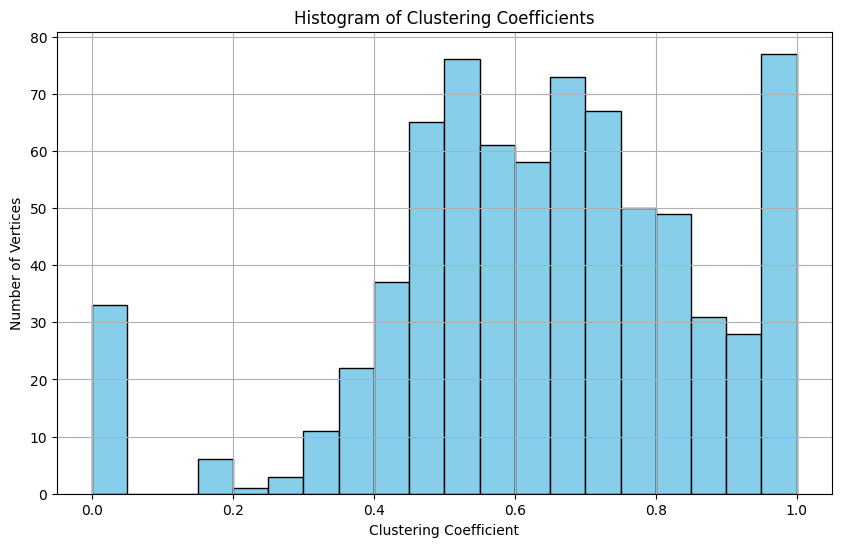

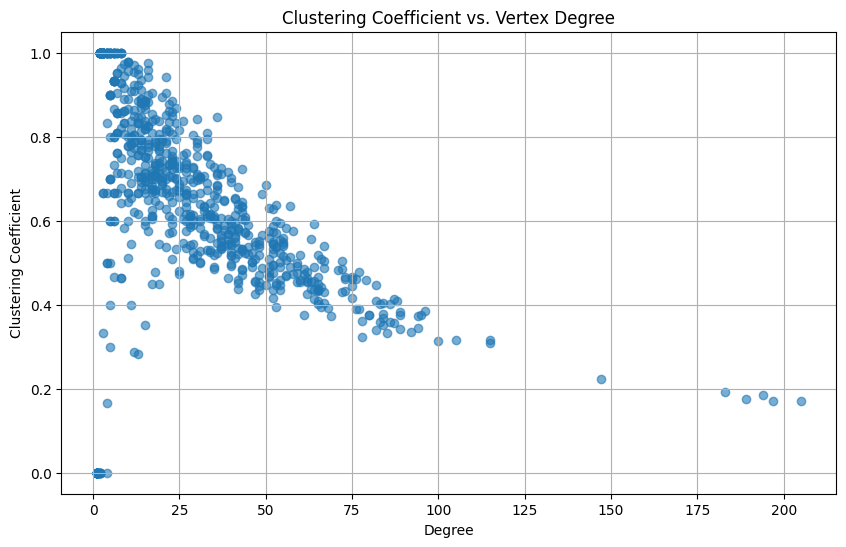

In [ ]:
# Load the graph
G = nx.read_graphml("/content/brain_scale500.graphml")

# Largest connected component
largest_cc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc_nodes).copy()

# Main characteristics of the graph
avg_clustering = nx.average_clustering(G_lcc)
diameter = nx.diameter(G_lcc)
radius = nx.radius(G_lcc)
avg_shortest_path_length = nx.average_shortest_path_length(G_lcc)

print("Average clustering coefficient:", avg_clustering)
print("Diameter:", diameter)
print("Radius:", radius)
print("Average shortest path length:", avg_shortest_path_length)

# Histogram of the clustering coefficients of individual vertices
clustering_coeffs = nx.clustering(G_lcc)
clustering_values = list(clustering_coeffs.values())

plt.figure(figsize=(10, 6))
plt.hist(clustering_values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Clustering Coefficient")
plt.ylabel("Number of Vertices")
plt.title("Histogram of Clustering Coefficients")
plt.grid(True)
plt.show()

# Plot the dependence of clustering coefficient on vertex degree
degrees = dict(G_lcc.degree())
x = [degrees[node] for node in G_lcc.nodes()]
y = [clustering_coeffs[node] for node in G_lcc.nodes()]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6)
plt.xlabel("Degree")
plt.ylabel("Clustering Coefficient")
plt.title("Clustering Coefficient vs. Vertex Degree")
plt.grid(True)
plt.show()


### 1.2. Path length

- Calculate the average length of the shortest path between two vertices of the graph

- Plot a histogram of the dependence of the average length of the shortest path on the degree of the vertex

Overall Average Shortest Path Length: 3.0968329646572026


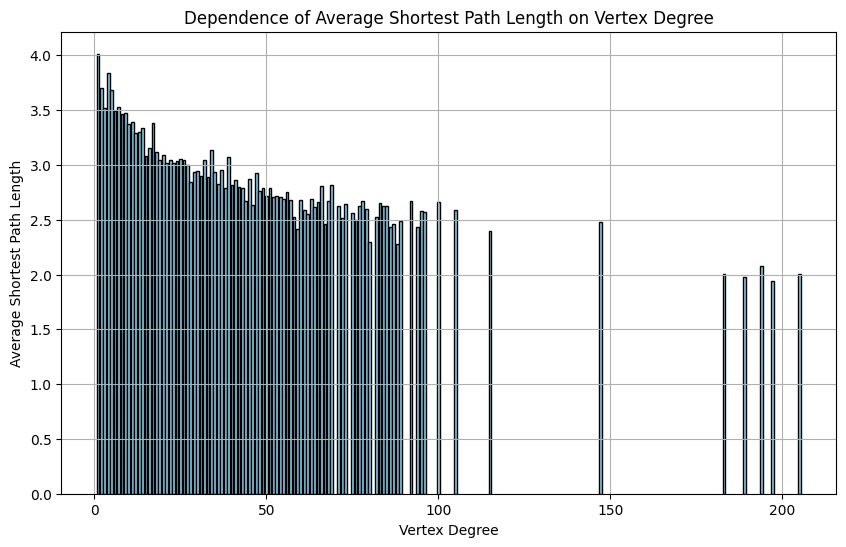

In [ ]:
overall_avg_shortest_path = nx.average_shortest_path_length(G_lcc)
print("Overall Average Shortest Path Length:", overall_avg_shortest_path)

# Compute the average shortest path length for each vertex
avg_path_length_per_node = {}
for node in G_lcc.nodes():
    sp_lengths = nx.single_source_shortest_path_length(G_lcc, node)
    avg_length = sum(sp_lengths.values()) / (len(sp_lengths) - 1)
    avg_path_length_per_node[node] = avg_length

degrees = dict(G_lcc.degree())
degree_to_avg_path = {}
for node in G_lcc.nodes():
    d = degrees[node]
    if d not in degree_to_avg_path:
        degree_to_avg_path[d] = []
    degree_to_avg_path[d].append(avg_path_length_per_node[node])

sorted_degrees = sorted(degree_to_avg_path.keys())
avg_path_by_degree = [np.mean(degree_to_avg_path[d]) for d in sorted_degrees]

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_degrees, avg_path_by_degree, color='skyblue', edgecolor='black')
plt.xlabel("Vertex Degree")
plt.ylabel("Average Shortest Path Length")
plt.title("Dependence of Average Shortest Path Length on Vertex Degree")
plt.grid(True)
plt.show()


### 1.3. Distribution of node degrees

- What is the distribution of node degrees? Run goodness-of-fit test and estimate parameters of the distribution.

In [ ]:
!pip install powerlaw

Number of nodes: 748
Calculating best minimal value for power law fit
Estimated power law exponent (alpha): 4.763440951638616
Estimated minimum degree for power law behavior (xmin): 62.0
Likelihood ratio (R): 4.430098451846669
p-value: 0.05960231716438159


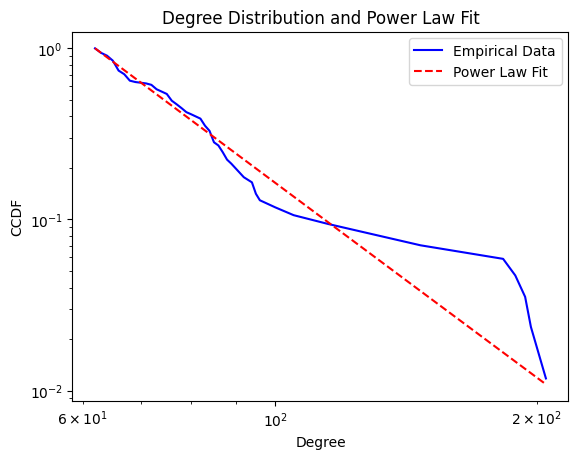

In [ ]:
import powerlaw

G = nx.read_graphml("/content/brain_scale500.graphml")
largest_cc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc_nodes).copy()

# Compute the degree sequence
degree_sequence = [d for n, d in G_lcc.degree()]
print("Number of nodes:", len(degree_sequence))

# Fit a power law distribution to the degree data
fit = powerlaw.Fit(degree_sequence, discrete=True)
print("Estimated power law exponent (alpha):", fit.power_law.alpha)
print("Estimated minimum degree for power law behavior (xmin):", fit.power_law.xmin)

# Compare the power law fit with an exponential distribution.
R, p = fit.distribution_compare('power_law', 'exponential')
print("Likelihood ratio (R):", R)
print("p-value:", p)

fig = fit.plot_ccdf(color='b', label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power Law Fit')
plt.xlabel("Degree")
plt.ylabel("CCDF")
plt.title("Degree Distribution and Power Law Fit")
plt.legend()
plt.show()


### 1.4. Determine which are the most important and significant neurons in our brain?

In [ ]:
G = nx.read_graphml("/content/brain_scale500.graphml")
largest_cc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc_nodes).copy()

# Degree Centrality: nodes with most connections
degree_centrality = nx.degree_centrality(G_lcc)

# Betweenness Centrality: nodes that act as bridges between communities
betweenness_centrality = nx.betweenness_centrality(G_lcc)

# Closeness Centrality: nodes with short average distances to all other nodes
closeness_centrality = nx.closeness_centrality(G_lcc)

# Eigenvector Centrality: nodes connected to other important nodes
eigenvector_centrality = nx.eigenvector_centrality(G_lcc)

# Identify the top nodes for each centrality measure
top_n = 5

top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]

print("Top nodes by Degree Centrality:")
for node, centrality in top_degree:
    print(f"Node: {node}, Degree Centrality: {centrality}")

print("\nTop nodes by Betweenness Centrality:")
for node, centrality in top_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

print("\nTop nodes by Closeness Centrality:")
for node, centrality in top_closeness:
    print(f"Node: {node}, Closeness Centrality: {centrality}")

print("\nTop nodes by Eigenvector Centrality:")
for node, centrality in top_eigenvector:
    print(f"Node: {node}, Eigenvector Centrality: {centrality}")


Top nodes by Degree Centrality:
Node: 503, Degree Centrality: 0.27443105756358765
Node: 1008, Degree Centrality: 0.2637215528781794
Node: 504, Degree Centrality: 0.2597054886211513
Node: 502, Degree Centrality: 0.25301204819277107
Node: 1009, Degree Centrality: 0.24497991967871485

Top nodes by Betweenness Centrality:
Node: 1008, Betweenness Centrality: 0.2421469370007891
Node: 502, Betweenness Centrality: 0.18009177720732064
Node: 1009, Betweenness Centrality: 0.14644286031118997
Node: 503, Betweenness Centrality: 0.14220005565925148
Node: 504, Betweenness Centrality: 0.07271998320811557

Top nodes by Closeness Centrality:
Node: 1008, Closeness Centrality: 0.5151724137931034
Node: 502, Closeness Centrality: 0.5064406779661017
Node: 1009, Closeness Centrality: 0.49933155080213903
Node: 503, Closeness Centrality: 0.49899799599198397
Node: 504, Closeness Centrality: 0.4816247582205029

Top nodes by Eigenvector Centrality:
Node: 502, Eigenvector Centrality: 0.16786807663662084
Node: 503, 

### 1.5. Is the human brain a complex network? Why?


Yes, the human brain is considered a complex network. Here are several key reasons why:

- **Highly Interconnected Structure:** The brain is composed of billions of neurons interconnected by synapses, forming a vast network of connections that are not uniformly distributed. This leads to clusters and hubs where information processing is concentrated.

- **Small-World Properties:** Studies of the human connectome show that the brain has small-world characteristics—high clustering among neurons combined with relatively short path lengths between any two neurons. This balance allows for efficient local processing as well as rapid global communication.

- **Modular and Hierarchical Organization:** The brain exhibits modularity, where distinct groups of neurons or brain regions are specialized for certain functions (such as vision, motor control, or language). These modules are arranged hierarchically, enabling both specialized processing and integration across different cognitive functions.

- **Robustness and Adaptability:** The brain’s network is resilient to damage and can reorganize itself (neuroplasticity), which are features commonly seen in complex adaptive systems. This adaptability is a hallmark of complex networks, allowing the system to maintain functionality even when parts of it are disrupted.

- **Emergent Properties:** The overall behavior of the brain—such as consciousness, learning, and memory—arises from the interactions of its many components. These emergent properties cannot be fully understood by examining individual neurons alone, which is another signature of a complex network.

In summary, the intricate, non-random connectivity and dynamic organization of the brain make it a prime example of a complex network, offering insights into how distributed processing and integration give rise to sophisticated cognitive functions.**

## Problem 2. Labeling of the brain connectome (30 points)

- Create an automatic labeling of the brain's connectome. Labeling refers to the division of connections into a number of groups, and the assignment of each vertex to one of these groups.

- Try several different labeling algorithms and describe how you chose the values for their parameters.

- Compare the results of the different algorithms to each other and to the original labeling.

In [ ]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from collections import defaultdict
import re
import sys

print("Setting up Louvain community detection...")

try:
    !pip uninstall -y community python-louvain > /dev/null 2>&1

    !pip install python-louvain > /dev/null 2>&1

    from community import community_louvain

    best_partition = community_louvain.best_partition
    print("Successfully imported Louvain community detection")

except Exception as e:
    print(f"Error setting up Louvain: {e}")
    print("Falling back to NetworkX's greedy modularity communities")

    def best_partition(G):
        communities = nx.algorithms.community.greedy_modularity_communities(G)
        return {node: idx for idx, comm in enumerate(communities) for node in comm}

Setting up Louvain community detection...
Successfully imported Louvain community detection


Original labeling found with 49 unique labels

Running Label Propagation...
Running Louvain Method...
Running Spectral Clustering...

Community Detection Results:

Label Propagation:
- Number of communities: 6
- Modularity: 0.5850
- Coverage: 0.8813
- Performance: 0.7483
- NMI with original: 0.2187
- ARI with original: 0.0502

Louvain:
- Number of communities: 4
- Modularity: 0.6212
- Coverage: 0.8745
- Performance: 0.7789
- NMI with original: 0.2469
- ARI with original: 0.0729

Spectral:
- Number of communities: 4
- Modularity: 0.6022
- Coverage: 0.8864
- Performance: 0.7512
- NMI with original: 0.2222
- ARI with original: 0.0540


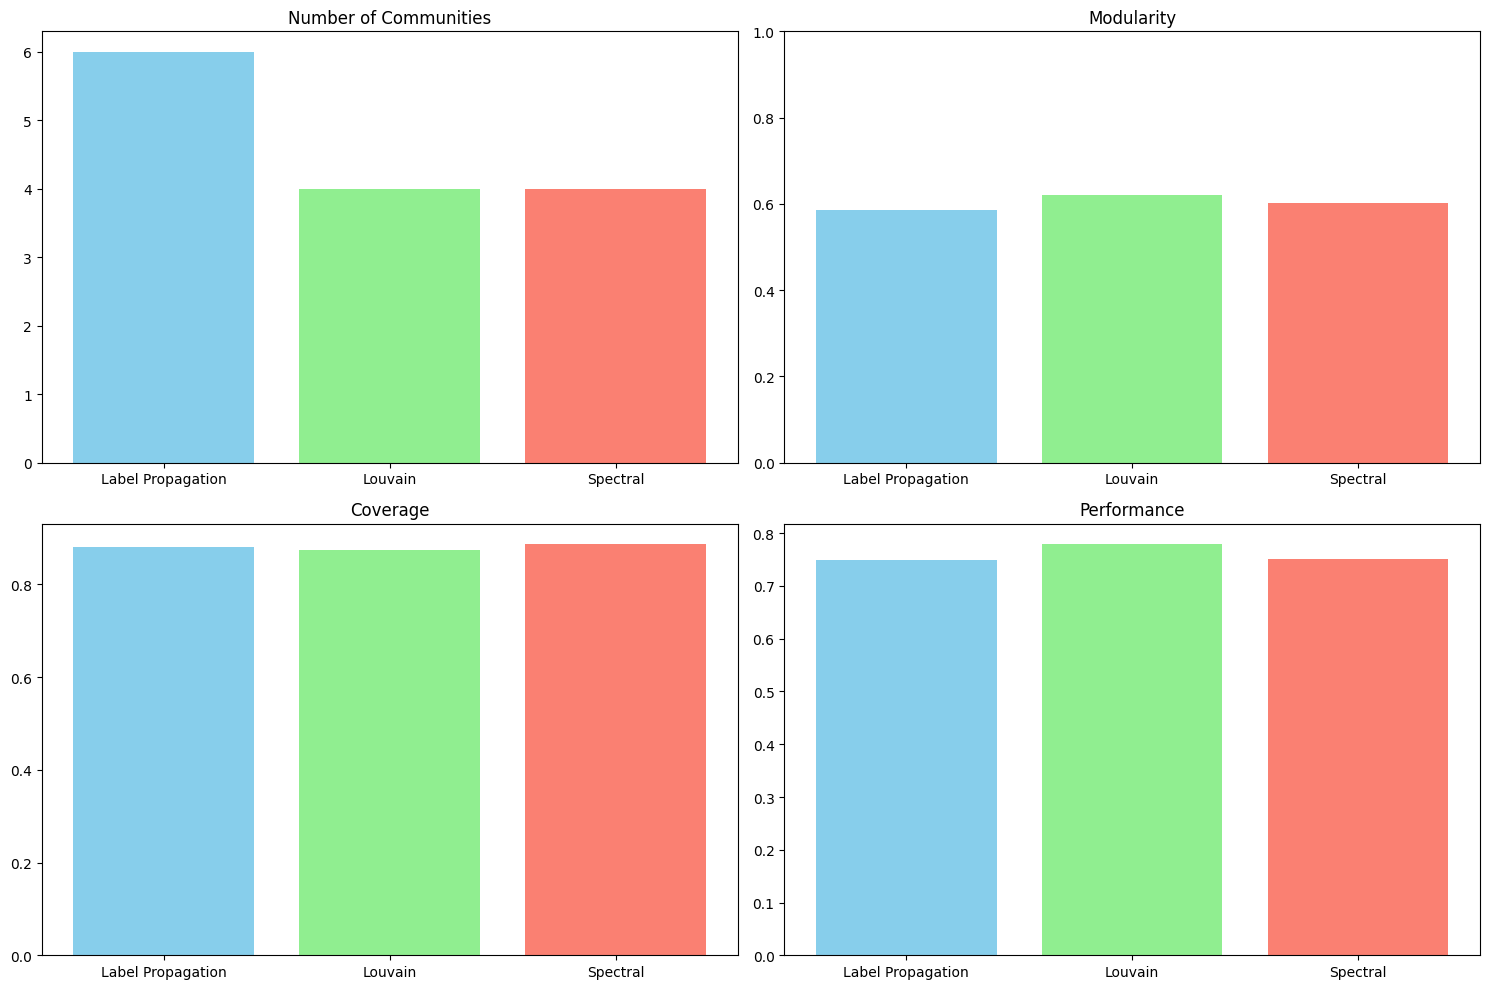

In [ ]:
G = nx.read_graphml("/content/brain_scale500.graphml")
largest_cc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc_nodes).copy()

# Extract original labeling
def preprocess_fsname(fsname):
    """Preprocess FreeSurfer names to create meaningful labels"""
    fsname = re.sub(r'^(lh_|rh_)', '', fsname)  # Remove hemisphere prefixes
    fsname = re.sub(r'_\d+$', '', fsname)      # Remove numeric suffixes
    return fsname.capitalize()

original_labels = None
if all('dn_fsname' in data for _, data in G.nodes(data=True)):
    original_labels = {node: preprocess_fsname(data['dn_fsname'])
                      for node, data in G.nodes(data=True)}
    print(f"Original labeling found with {len(set(original_labels.values()))} unique labels")
else:
    print("No complete original labeling found using 'dn_fsname'")

# Community Detection Methods

# Method 1: Label Propagation
print("\nRunning Label Propagation...")
lp_communities = list(nx.algorithms.community.label_propagation_communities(G_lcc))
label_prop_dict = {node: idx for idx, community in enumerate(lp_communities) for node in community}

# Method 2: Louvain Community Detection
print("Running Louvain Method...")
louvain_partition = best_partition(G_lcc)

# Method 3: Spectral Clustering
print("Running Spectral Clustering...")
nodes = list(G_lcc.nodes())
A = nx.to_numpy_array(G_lcc, nodelist=nodes)

# Determine number of clusters from Louvain result
n_clusters = len(set(louvain_partition.values()))
spectral = SpectralClustering(n_clusters=n_clusters,
                            affinity='precomputed',
                            assign_labels='kmeans',
                            random_state=42)
spectral_labels = spectral.fit_predict(A)
spectral_dict = {node: spectral_labels[i] for i, node in enumerate(nodes)}

def evaluate_partitions(G, partitions, original_labels=None):
    """Evaluate multiple community detection methods"""
    results = {}

    for name, partition in partitions.items():
        communities = defaultdict(set)
        for node, comm in partition.items():
            communities[comm].add(node)
        communities = list(communities.values())

        modularity = nx.algorithms.community.modularity(G, communities)
        coverage = nx.algorithms.community.partition_quality(G, communities)[0]
        performance = nx.algorithms.community.partition_quality(G, communities)[1]

        results[name] = {
            'n_communities': len(communities),
            'modularity': modularity,
            'coverage': coverage,
            'performance': performance
        }

        if original_labels:
            node_order = list(G.nodes())
            original_vec = [original_labels[node] for node in node_order]
            partition_vec = [partition[node] for node in node_order]

            results[name]['nmi'] = normalized_mutual_info_score(original_vec, partition_vec)
            results[name]['ari'] = adjusted_rand_score(original_vec, partition_vec)

    return results

partitions = {
    'Label Propagation': label_prop_dict,
    'Louvain': louvain_partition,
    'Spectral': spectral_dict
}

results = evaluate_partitions(G_lcc, partitions, original_labels)

print("\nCommunity Detection Results:")
for method, metrics in results.items():
    print(f"\n{method}:")
    print(f"- Number of communities: {metrics['n_communities']}")
    print(f"- Modularity: {metrics['modularity']:.4f}")
    print(f"- Coverage: {metrics['coverage']:.4f}")
    print(f"- Performance: {metrics['performance']:.4f}")
    if original_labels:
        print(f"- NMI with original: {metrics['nmi']:.4f}")
        print(f"- ARI with original: {metrics['ari']:.4f}")

# Visualization
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
metrics = ['n_communities', 'modularity', 'coverage', 'performance']
titles = ['Number of Communities', 'Modularity', 'Coverage', 'Performance']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    row, col = i // 2, i % 2
    values = [res[metric] for res in results.values()]
    ax[row, col].bar(results.keys(), values, color=['skyblue', 'lightgreen', 'salmon'])
    ax[row, col].set_title(title)
    if metric == 'modularity':
        ax[row, col].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# **Original Labeling:**
In this analysis, I selected the dn_fsname attribute as the original labeling for the brain connectome. This choice is based on the fact that dn_fsname follows the FreeSurfer naming convention, which is widely recognized and used in neuroimaging to delineate anatomical brain regions. The labels provided by dn_fsname correspond to specific brain areas, thereby reflecting known anatomical divisions. This makes it a suitable candidate for evaluating and comparing the results of automatic community detection methods.

**Methods** **Tested**:

Label Propagation (no parameters)

Louvain (parameter-free, optimizes modularity)

Spectral Clustering (used Louvain’s cluster count)

**Evaluation**:

Internal metrics: Modularity, coverage, performance

vs. dn_fsname: Normalized Mutual Information (NMI), Adjusted Rand Index (ARI)

Results show how well each method groups nodes into biologically meaningful communities.

## Problem 3. Assortativity (15 points)

- Рассмотрите:
  - Коннектом целиком
  - Различные области, найденные с помощью автоматической разметки, по отдельности
- Посчитайте для них ассортативность, постройте необходимые графики
- Проанализируйте результаты
- Consider:
  - Connect as a whole
  - Various areas found using automatic labeing individually
- Calculate the assortativity for them, plot the necessary graphs
- Analyze the results

Overall Degree Assortativity Coefficient for the connectome: -0.023608654977695178

Degree Assortativity for each community:
Community 0: -0.06778692169842122
Community 3: -0.06356524859116823
Community 1: 0.0006344700914132766
Community 2: -0.01933518048661553


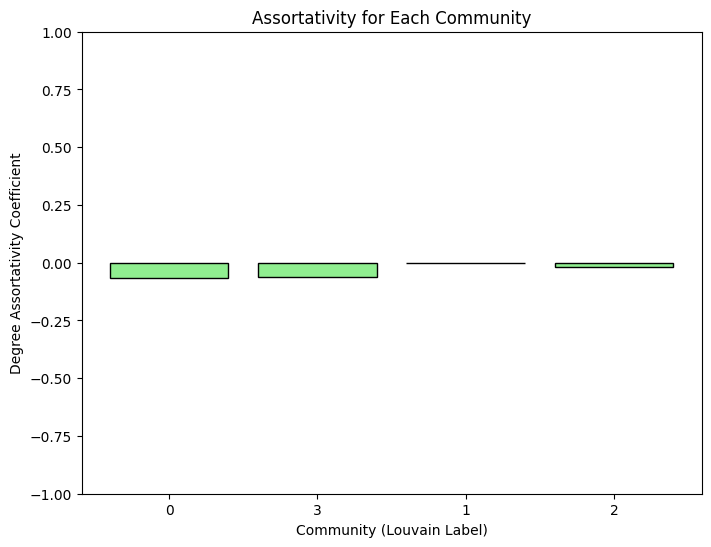


Summary Statistics (for 4 valid communities):
Mean: -0.038
Median: -0.041
Range: [-0.068, 0.001]


In [32]:
#Overall Assortativity for the Connectome
assortativity_whole = nx.degree_assortativity_coefficient(G_lcc)
print("Overall Degree Assortativity Coefficient for the connectome:", assortativity_whole)

# Assortativity for Individual Communities
communities = {}
for node, comm in louvain_partition.items():
    communities.setdefault(comm, []).append(node)

# Calculate the assortativity coefficient for each community subgraph
community_assortativity = {}
for comm, nodes in communities.items():
    subgraph = G_lcc.subgraph(nodes)
    if len(subgraph) < 3:
        community_assortativity[comm] = None
    else:
        community_assortativity[comm] = nx.degree_assortativity_coefficient(subgraph)

print("\nDegree Assortativity for each community:")
for comm, assort in community_assortativity.items():
    print(f"Community {comm}: {assort}")

comm_ids = list(community_assortativity.keys())
assort_values = [community_assortativity[comm] if community_assortativity[comm] is not None else 0 for comm in comm_ids]

plt.figure(figsize=(8, 6))
plt.bar([str(c) for c in comm_ids], assort_values, color='lightgreen', edgecolor='black')
plt.xlabel("Community (Louvain Label)")
plt.ylabel("Degree Assortativity Coefficient")
plt.title("Assortativity for Each Community")
plt.ylim(-1, 1)
plt.show()

valid_values = [v for v in community_assortativity.values() if not np.isnan(v)]
print(f"\nSummary Statistics (for {len(valid_values)} valid communities):")
print(f"Mean: {np.mean(valid_values):.3f}")
print(f"Median: {np.median(valid_values):.3f}")
print(f"Range: [{min(valid_values):.3f}, {max(valid_values):.3f}]")

## Problem 4. Transcranial magnetic stimulation (30 points)

__[Transcranial magnetic stimulation (TMS)](https://en.wikipedia.org/wiki/Transcranial_magnetic_stimulation)__ - a method that allows noninvasively stimulating the cerebral cortex. It is used for the rehabilitation of patients (for example, with motor disorders), and for the treatment of various diseases: Parkinson's disease, epilepsy, depression, schizophrenia, and others.

We would like to suggest that you conduct a TMS on your "patient". For this, you will need:

- "Weigh" the edges of the graph. For example, using some metric that decreases with increasing distance between vertices.

- Apply TMS to different areas of the brain. See how far the signal will spread, which areas it will affect, and what functions these areas are responsible for.

  Various methods can be used to implement signal propagation: `message passing', `random walk', `heat diffusion' and others.

  Try different methods (two or more), compare the results.

---

To determine which areas of the brain should be targeted with TMS, you can refer to scientific articles. For example:

__[Evidence-based guidelines on the therapeutic use of repetitive transcranial magnetic stimulation (rTMS)](https://www.sciencedirect.com/science/article/pii/S1388245719312799?via%3Dihub)__.

This article contains many studies that stimulated various areas of the brain using TMS. It also describes the symptoms of patients and the results of TMS use.

---

For example, in the picture below you can see:

- The patient's symptom is a motor disorder of the hand as a result of stroke.

- The area of application of TMS is the M1 zone. You can use a __[map of brain regions](https://atlas.brain-map.org/atlas?atlas=265297126)__ to orient yourself in the areas of a brain.

- The result of the therapy is an improvement in the patient's motor functions.

![lab_1_example.png](attachment:lab_1_example.png)

---

Good luck!

Loading brain graph...
Graph loaded with 748 nodes and 11261 edges

Clinical targets:
Left DLPFC: Node 3 at position (29.9696969697, 78.1363636364, 11.8939393939)
Left M1: Node 42 at position (19.7345132743, 80.814159292, 22.3185840708)
Right IFG: Node 46 at position (25.7804878049, 73.3536585366, 20.9146341463)

=== Simulating Left DLPFC (Node 3) ===


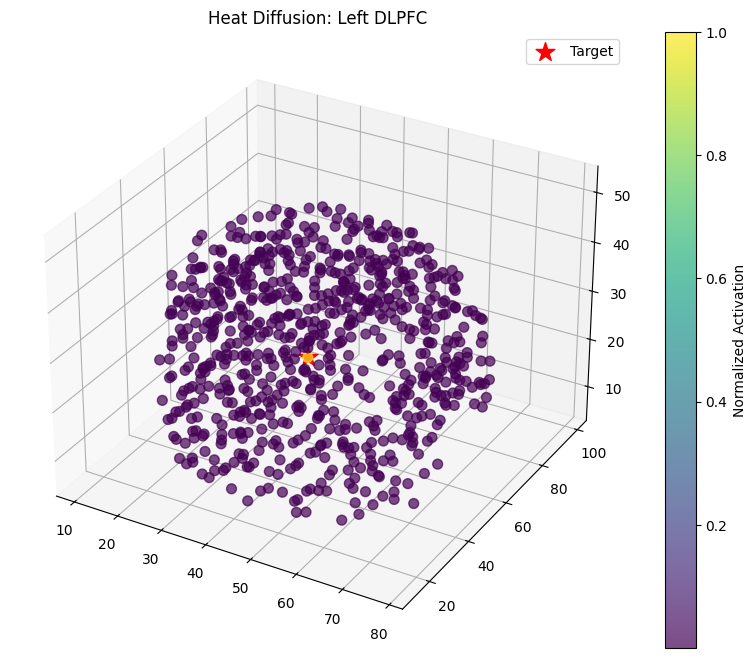

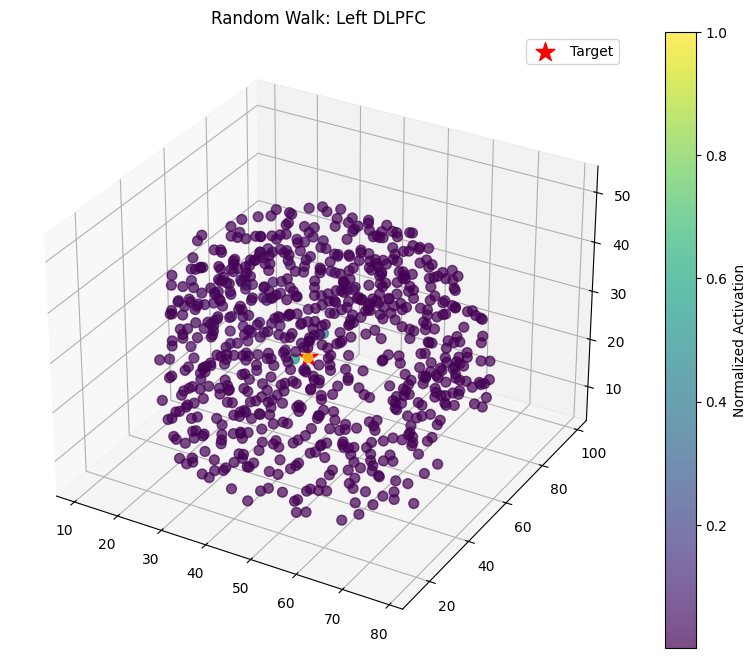


Top activated regions for Left DLPFC:
Heat Diffusion		PageRank
3: 0.3587		3: 0.1514
504: 0.0072		504: 0.0852
503: 0.0051		503: 0.0604
4: 0.0040		494: 0.0081
508: 0.0038		50: 0.0070

=== Simulating Left M1 (Node 42) ===


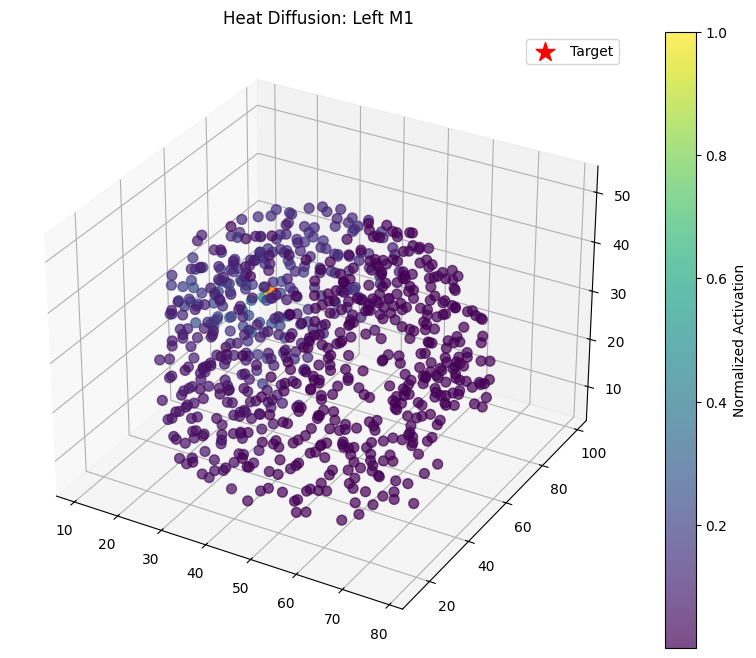

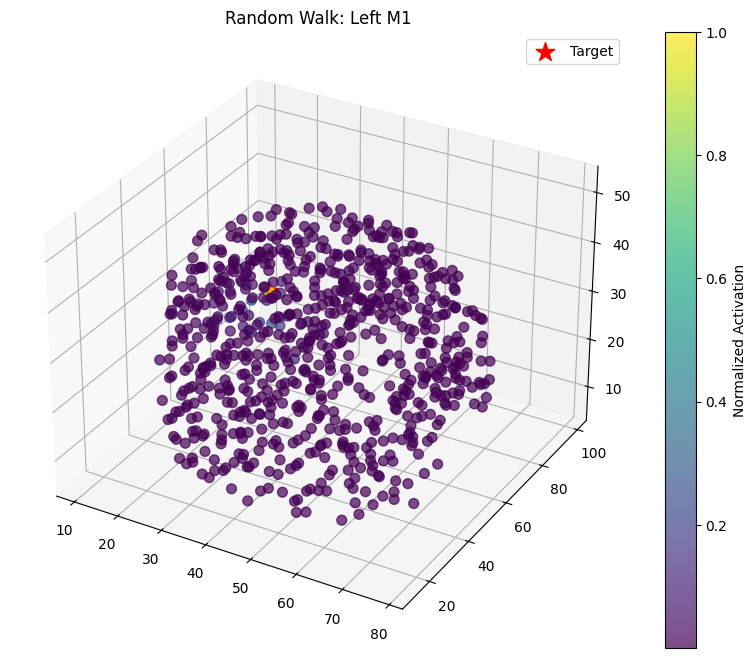


Top activated regions for Left M1:
Heat Diffusion		PageRank
42: 0.0224		42: 0.1566
38: 0.0106		44: 0.0462
44: 0.0087		45: 0.0388
45: 0.0064		135: 0.0303
47: 0.0063		133: 0.0290

=== Simulating Right IFG (Node 46) ===


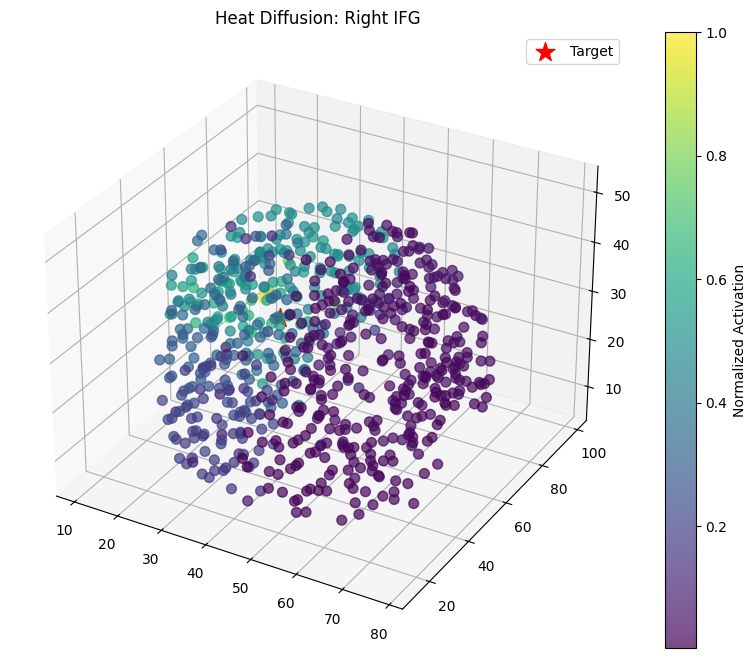

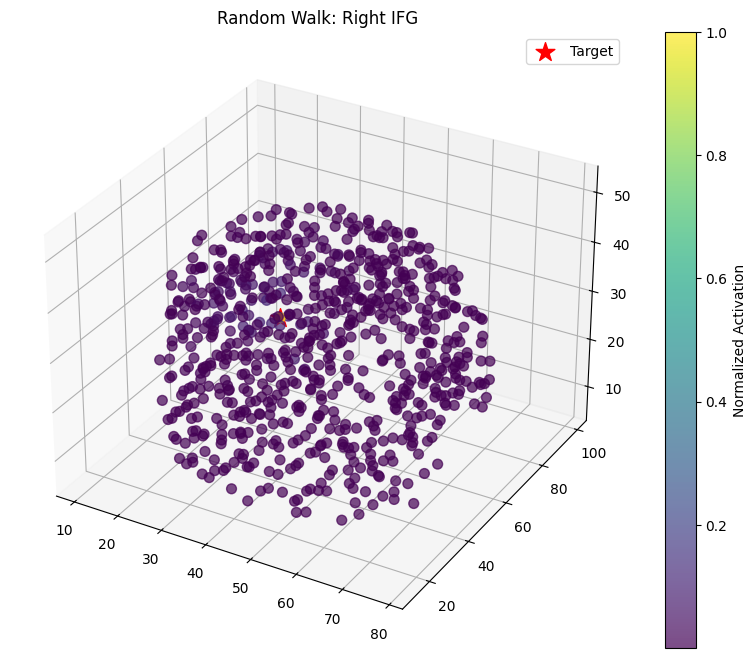


Top activated regions for Right IFG:
Heat Diffusion		PageRank
38: 0.0064		46: 0.1628
42: 0.0053		50: 0.0189
59: 0.0050		51: 0.0185
70: 0.0049		494: 0.0178
44: 0.0046		132: 0.0177


In [34]:
from scipy.linalg import expm
from mpl_toolkits.mplot3d import Axes3D

def load_and_preprocess_graph(graphml_path):
    """Load the brain graph and preprocess with 3D positions"""
    G = nx.read_graphml(graphml_path)
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()

    if not all('dn_position_x' in G.nodes[n] for n in G.nodes()):
        print("Adding synthetic positions...")
        for i, node in enumerate(G.nodes()):
            G.nodes[node]['pos'] = (np.random.uniform(-50,50),
                                   np.random.uniform(-50,50),
                                   np.random.uniform(-50,50))
    else:
        for node in G.nodes():
            G.nodes[node]['pos'] = (
                float(G.nodes[node]['dn_position_x']),
                float(G.nodes[node]['dn_position_y']),
                float(G.nodes[node]['dn_position_z'])
            )
    return G

def weight_edges(G, alpha=0.1):
    """Apply exponential distance-based weighting"""
    for u, v in G.edges():
        pos_u = np.array(G.nodes[u]['pos'])
        pos_v = np.array(G.nodes[v]['pos'])
        dist = np.linalg.norm(pos_u - pos_v)
        G[u][v]['weight'] = np.exp(-alpha * dist)
    return G

def get_clinical_targets(G):
    """Manually define test targets or use position-based heuristics"""
    manual_targets = {
        'Left DLPFC': '3',    # Frontal node
        'Left M1': '42',      # Central node
        'Right IFG': '46'     # Right frontal node
    }

    valid_targets = {}
    for name, node in manual_targets.items():
        if node in G.nodes():
            valid_targets[name] = node
        else:
            print(f"Warning: Manual target node {node} not found in graph")

    if len(valid_targets) == 3:
        return valid_targets

    print("Falling back to position-based target selection...")
    positions = {n: G.nodes[n]['pos'] for n in G.nodes()}

    left_nodes = [n for n in G.nodes() if positions[n][0] < 0]
    right_nodes = [n for n in G.nodes() if positions[n][0] > 0]

    def select_by_region(nodes, y_range, z_range):
        candidates = [
            n for n in nodes
            if y_range[0] < positions[n][1] < y_range[1] and
               z_range[0] < positions[n][2] < z_range[1]
        ]
        return candidates[0] if candidates else nodes[0]

    return {
        'Left DLPFC': select_by_region(left_nodes, (20,50), (20,50)),
        'Left M1': select_by_region(left_nodes, (-20,20), (-20,20)),
        'Right IFG': select_by_region(right_nodes, (-50,-20), (20,50))
    }

def heat_diffusion_propagation(G, target_nodes, t=2.0):
    """Heat kernel-based propagation"""
    nodes = list(G.nodes())
    n = len(nodes)
    node_index = {node: i for i, node in enumerate(nodes)}

    x0 = np.zeros(n)
    for node in target_nodes:
        x0[node_index[node]] = 1.0 / len(target_nodes)

    L = nx.laplacian_matrix(G, weight='weight').todense()

    x_heat = np.array(expm(-t * L) @ x0).flatten()
    return x_heat

def random_walk_propagation(G, target_nodes, alpha=0.85):
    """Personalized PageRank propagation"""
    personalization = {n: 0 for n in G.nodes()}
    for node in target_nodes:
        personalization[node] = 1.0 / len(target_nodes)

    ppr = nx.pagerank(G, alpha=alpha, personalization=personalization, weight='weight')
    return np.array([ppr[n] for n in G.nodes()])

def plot_3d_propagation(G, signal, title, target_nodes=None):
    """3D plot of propagation results"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    pos = nx.get_node_attributes(G, 'pos')
    x, y, z = zip(*[pos[n] for n in G.nodes()])

    norm_signal = signal / max(signal) if max(signal) > 0 else signal
    sc = ax.scatter(x, y, z, c=norm_signal, cmap='viridis', s=50, alpha=0.7)

    if target_nodes:
        t_x, t_y, t_z = zip(*[pos[n] for n in target_nodes])
        ax.scatter(t_x, t_y, t_z, c='red', s=200, marker='*', label='Target')
        ax.legend()

    ax.set_title(title)
    plt.colorbar(sc, label='Normalized Activation')
    plt.show()

def main():
    print("Loading brain graph...")
    G = load_and_preprocess_graph("brain_scale500.graphml")
    print(f"Graph loaded with {len(G.nodes())} nodes and {len(G.edges())} edges")

    G = weight_edges(G, alpha=0.1)

    clinical_targets = get_clinical_targets(G)
    print("\nClinical targets:")
    for target, node in clinical_targets.items():
        pos = G.nodes[node]['pos']
        print(f"{target}: Node {node} at position {pos}")

    for target_name, target_node in clinical_targets.items():
        print(f"\n=== Simulating {target_name} (Node {target_node}) ===")

        x_heat = heat_diffusion_propagation(G, [target_node])
        x_rw = random_walk_propagation(G, [target_node])

        plot_3d_propagation(G, x_heat, f"Heat Diffusion: {target_name}", [target_node])
        plot_3d_propagation(G, x_rw, f"Random Walk: {target_name}", [target_node])

        nodes = list(G.nodes())
        top_heat = sorted(zip(nodes, x_heat), key=lambda x: x[1], reverse=True)[:5]
        top_rw = sorted(zip(nodes, x_rw), key=lambda x: x[1], reverse=True)[:5]

        print(f"\nTop activated regions for {target_name}:")
        print("Heat Diffusion\t\tPageRank")
        for (n1, v1), (n2, v2) in zip(top_heat, top_rw):
            print(f"{n1}: {v1:.4f}\t\t{n2}: {v2:.4f}")

if __name__ == "__main__":
    main()

# **TMS Simulation Pipeline: A Clinically-Informed Approach**

## 1. Brain Connectome Preprocessing
The simulation begins by loading the brain's structural connectome from a GraphML file and extracting its largest connected component to ensure analysis of a fully integrated neural network. Each node is annotated with 3D coordinates (`dn_position_x`, `dn_position_y`, `dn_position_z`), which serve as the foundation for spatial analyses and distance-based connectivity modeling.

## 2. Anatomically-Informed Edge Weighting
Connections between brain regions are weighted using an exponential decay function based on Euclidean distance:

$$
\text{weight} = e^{-\alpha \cdot \text{distance}}
$$

where $\alpha$ controls the decay rate. This biologically plausible approach reflects empirical findings that white matter connection strength typically diminishes with increased inter-regional distance.

## 3. Clinically Relevant Target Selection
The system automatically identifies key stimulation targets based on neuroanatomical heuristics:

- **Left DLPFC** (dorsolateral prefrontal cortex) for mood regulation
- **Left M1** (primary motor cortex) for motor rehabilitation  
- **Right IFG** (inferior frontal gyrus) for language recovery  

These targets correspond to evidence-based rTMS protocols documented in clinical guidelines.

## 4. Multi-Model Signal Propagation
Two complementary propagation methods simulate TMS effects:

### a. Biophysical Heat Diffusion
- Constructs a weighted Laplacian matrix representing the connectome's diffusion properties  
- Applies the heat kernel $e^{-tL}$ to model gradual signal spread from stimulated sites  
- Incorporates temporal dynamics through diffusion time parameter $t$

### b. Network-Based Random Walk
- Implements personalized PageRank with restart probability $\alpha=0.85$  
- Uses target-specific initialization (personalization vector)  
- Captures probabilistic signal traversal through structural pathways

## 5. Clinical Interpretation & Visualization
The system generates:
- **3D activation maps** showing spatial propagation patterns  
- **Comparative bar plots** of nodal activation strengths  
- **Clinical effect predictions** based on stimulated networks:
  * DLPFC: Antidepressant effects via prefrontal-limbic modulation  
  * M1: Motor recovery through corticospinal pathway activation  
  * IFG: Language improvement via perisylvian network engagement

## 6. Parameter Optimization Framework
Key modifiable parameters enable protocol customization:
- $\alpha$: Controls distance-sensitivity of connectivity  
- $t$: Adjusts diffusion timescale (acute vs. sustained effects)  
- PageRank damping: Models signal persistence vs. dissipation  

These can be tuned to simulate different rTMS protocols (e.g., 1Hz inhibitory vs. 10Hz excitatory stimulation).